In [737]:
import pandas as pd
import numpy as np

### Import data

In [847]:
#Number of infected for past two weeks
X = pd.read_csv('data.csv').iloc[:,1:-2].values

#Number of recovered
y = pd.read_csv('data.csv').iloc[:,-2].values

#Number of recovered with transformation to smooth data
y_smoothed = pd.read_csv('data.csv').iloc[:,-1].values

#  Linear regression model

In [848]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [854]:
# split into train and test sets

pct_90 = int(np.ceil(90*len(X)/100))

#predict las 10%

y_train, y_test = y_smoothed[:pct_90], y_smoothed[pct_90:]
X_train, X_test = X[:pct_90], X[pct_90:]

In [855]:
regressor = LinearRegression(normalize=True)  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [856]:
y_pred = regressor.predict(X_test)


In [857]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

Actual   Predicted
0   300.0  812.546456
1   500.0   20.550017
2   400.0  317.369969
3   400.0  479.466686
4   400.0  277.370949
5   400.0  648.836375

In [858]:
print('Mean Absolute Error:',  "%.2f" % (metrics.mean_absolute_error(y_test, y_pred),))  
print('Mean Squared Error:', "%.2f" % (metrics.mean_squared_error(y_test, y_pred),) )  
print('Root Mean Squared Error:', "%.2f" % (np.sqrt(metrics.mean_squared_error(y_test, y_pred),)))

Mean Absolute Error: 254.26
Mean Squared Error: 97112.71
Root Mean Squared Error: 311.63


In [859]:
regressor.coef_

array([ 0.06986268, -0.08369076, -0.06956719,  0.08705796,  0.22234065,
       -0.10884554,  0.03023897,  0.1078159 , -0.19794925,  0.04850429,
       -0.23710497,  0.07930176, -0.03724605,  0.35571477, -0.2068654 ])

In [860]:
print("R^2 Score: ","%.3f" % (regressor.score(X_test, y_test),) )

R^2 Score:  -28.134


In [861]:
coeff_df = pd.DataFrame(regressor.coef_, dataframe.iloc[:,1:].columns, columns=['Coefficient'])  
coeff_df

Coefficient
Infected cases t-7      0.069863
Infected cases t-8     -0.083691
Infected cases t-9     -0.069567
Infected cases t-10     0.087058
Infected cases t-11     0.222341
Infected cases t-12    -0.108846
Infected cases t-13     0.030239
Infected cases t-14     0.107816
Infected cases t-15    -0.197949
Infected cases t-16     0.048504
Infected cases t-17    -0.237105
Infected cases t-18     0.079302
Infected cases t-19    -0.037246
Infected cases t-20     0.355715
Infected cases t-21    -0.206865

### Plot coefficients (distribution of gamma)

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


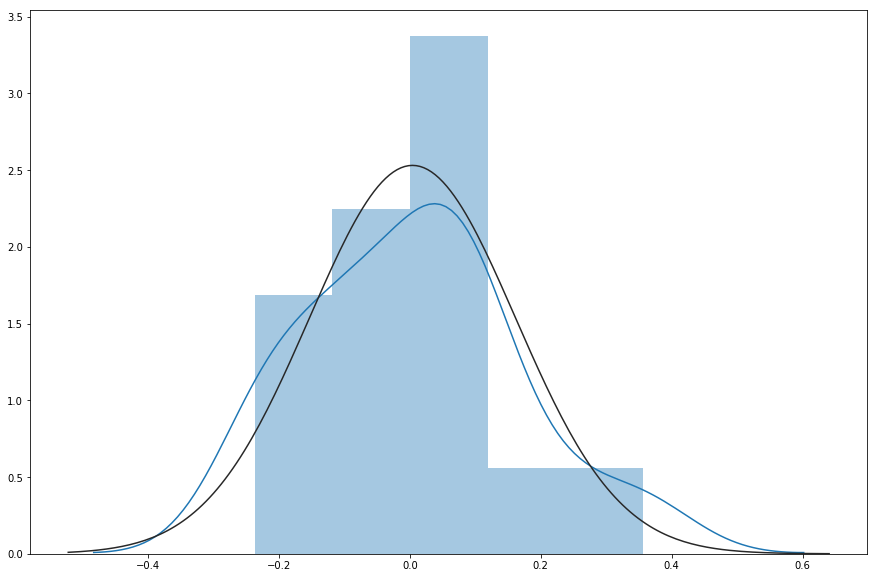

In [862]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(coeff_df, fit=norm)

**Update this**

For a unit increase in the number of recovered individuals at time t, that means there is:
- An increase of 21 infected at day t-20
- A decrease of 13 infected at day t-18

We see that the closer we are to the recovery date, the lower the number of infected cases has an impact on the number od recovered cases 

### Plot Actual values (y test) versus predicted values

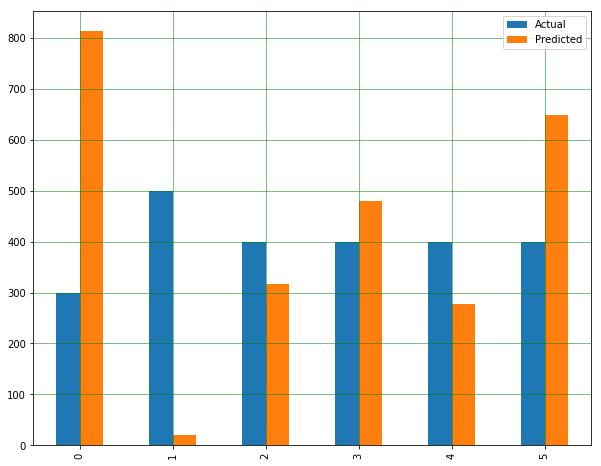

In [863]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

There are many factors that may have contributed to this inaccuracy, for example :

- **Need more data**: We need to have a huge amount of data to get the best possible prediction.
- **Bad assumptions**: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help us determine that.
- **Poor features**: The features we used may not have had a high enough correlation to the values we were trying to predict.

#  ridge regression (L2)

In [864]:
from sklearn.linear_model import Ridge
from sklearn import linear_model
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)


In [870]:
#y = dataframe_new['Recovered cases'].values
#X = dataframe_new.iloc[:,1:].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# split into train and test sets

pct_90 = int(np.ceil(90*len(X)/100))

#predict las 10%

y_train, y_test = y_smoothed[:pct_90], y_smoothed[pct_90:]
X_train, X_test = X[:pct_90], X[pct_90:]

In [871]:
# Create ridge regression with three possible alpha values

clf = Ridge(alpha=1, normalize=True)
# Fit the linear regression
model = clf.fit(X_train, y_train)

#y_pred = clf.predict(X_test)
y_pred = clf.predict(X_test)

In [872]:
clf.score(X_test, y_test)

-5.07400038272124

In [873]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 119.12947825161866
Mean Squared Error: 20246.667942404132
Root Mean Squared Error: 142.2907865689277


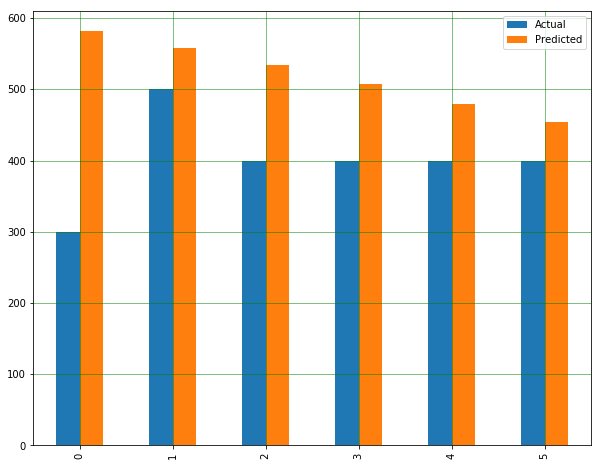

In [874]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#  Lasso Regression (L1)

In [878]:
#y = dataframe_new['Recovered cases'].values
#X = dataframe_new.iloc[:,1:].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# split into train and test sets

pct_90 = int(np.ceil(90*len(X)/100))

#predict las 10%

y_train, y_test = y_smoothed[:pct_90], y_smoothed[pct_90:]
X_train, X_test = X[:pct_90], X[pct_90:]

clf = linear_model.Lasso(alpha=0.1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


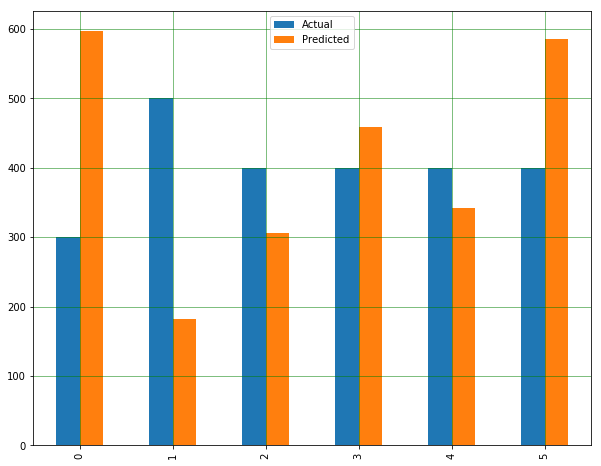

In [879]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [880]:
clf.score(X_test, y_test)

-11.000571196195937

# Linear Elastic Net regression 
(Linear regression with combined L1 and L2 priors as regularizer)

The elastic net method overcomes the limitations of the LASSO (least absolute shrinkage and selection operator) method which uses a penalty function based on

$$||\beta||_1=\sum_{j=1}^p{|\beta_j|}$$

The parameters for the elastic net method are defined by

$$\hat{\beta}\equiv \text{argmin}_{\beta}(||y-X\beta||^2+\lambda_2||\beta||^2+\lambda_1||\beta||_1)$$

In our case here, $\lambda_1=\lambda_2=\alpha$

In [886]:
y = dataframe_new['Recovered Daily'].values
X = dataframe_new.iloc[:,1:].values

#-----#

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# split into train and test sets

pct_90 = int(np.ceil(90*len(X)/100))

#predict las 10%

X_train, X_test = X[:pct_90], X[pct_90:]
y_train, y_test =y_smoothed[:pct_90], y_smoothed[pct_90:]


#-----#

clf = linear_model.ElasticNet(alpha=0.1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [887]:
import scipy

In [888]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


Actual   Predicted
0   300.0  596.903667
1   500.0  181.533162
2   400.0  305.561414
3   400.0  459.528520
4   400.0  342.322129
5   400.0  586.150335

In [890]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 168.86096946147723
Mean Squared Error: 40002.31492155245
Root Mean Squared Error: 200.00578722015135


In [891]:
coeff_df = pd.DataFrame(regressor.coef_, dataframe.iloc[:,1:].columns, columns=['Coefficient'])  
coeff_df

Coefficient
Infected cases t-7      0.069863
Infected cases t-8     -0.083691
Infected cases t-9     -0.069567
Infected cases t-10     0.087058
Infected cases t-11     0.222341
Infected cases t-12    -0.108846
Infected cases t-13     0.030239
Infected cases t-14     0.107816
Infected cases t-15    -0.197949
Infected cases t-16     0.048504
Infected cases t-17    -0.237105
Infected cases t-18     0.079302
Infected cases t-19    -0.037246
Infected cases t-20     0.355715
Infected cases t-21    -0.206865

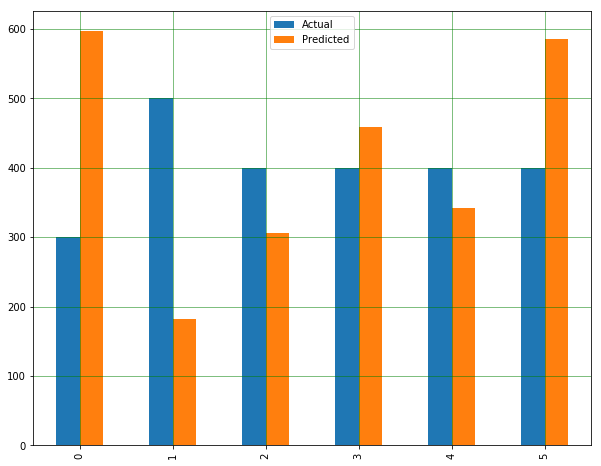

In [892]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Laplacian

In [902]:
y = dataframe_new['Recovered Daily'].values
X = dataframe_new.iloc[:,1:].values

#-----#

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# split into train and test sets

pct_90 = int(np.ceil(90*len(X)/100))

#predict las 10%

X_train, X_test = X[:pct_90], X[pct_90:]
y_train, y_test =y_smoothed[:pct_90], y_smoothed[pct_90:]



In [903]:
X_train.shape

(58, 15)

### Laplacian Regression using optimize.minimize

In [905]:
import sys

#X aas args, aergs only values we are looking forward optimizing

N = 15
pct_90 = int(np.ceil(90*len(X)/100))


X_train, X_test = X[:pct_90], X[pct_90:]
y_train, y_test =y_smoothed[:pct_90], y_smoothed[pct_90:]

def func(x):
    
    gamma = np.array(x[:N])
    
    M_values = x[N:]
    
    M = M_values.reshape(N,N)
        
    X = X_train @ M
    
    # If we decide to apply the basic ridge loss, that is minimize |y - XMG|^2 +0.1*|G|**2
    
    to_min = np.linalg.norm(y_train - X_train @ M @ gamma)**2 + 0.1 * np.linalg.norm(gamma)**2
    #pred_train_rr= rr.predict(X_train)
    
    # If we decide to minimize the sum of gamma squared
    
    to_min2 = np.sum(gamma**2)
    
    fail = sys.maxsize * 2 + 1
    
    if np.sum(gamma>0) == len(gamma):
        return to_min2
    else:
        return fail

length = N + N**2

In [906]:
lap_slsqp = scipy.optimize.minimize(func,np.random.rand(1, length), method='SLSQP')

gamma = lap_slsqp['x'][:N]
M = lap_slsqp['x'][N:].reshape(N,N)

In [907]:

clf = linear_model.Ridge(alpha=1.0)

clf.fit(X_train @ M, y_train)

#clf.coef_ = gamma

y_pred = clf.predict(X_test @ M)

In [908]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


Actual   Predicted
0   300.0  811.981413
1   500.0   20.862761
2   400.0  317.332944
3   400.0  479.157475
4   400.0  277.586414
5   400.0  648.884126

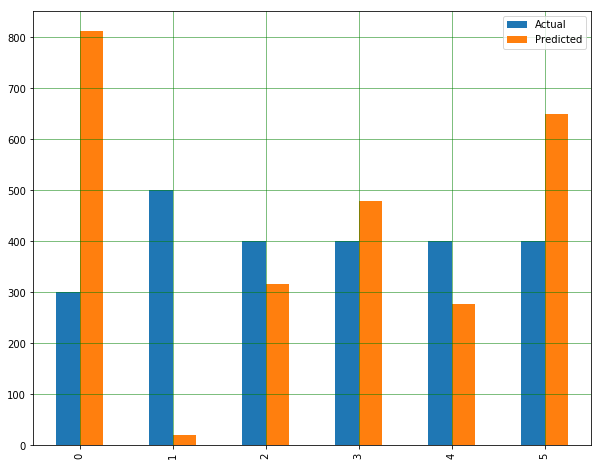

In [909]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [910]:
clf.coef_

array([-4.11364901,  4.86733676,  1.91516118,  2.75036159, -1.73591152,
       -1.92142457,  0.52038967, -6.1068583 , -6.10737122,  1.28910902,
        6.28632402, -0.34543035,  3.82757968, -0.64019933, -1.52107029])

In [911]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 254.04014919052133
Mean Squared Error: 96954.26726466672
Root Mean Squared Error: 311.374801910281


In [912]:
gamma

array([4.61888527e-04, 5.10860163e-04, 1.44166347e-04, 6.11053105e-07,
       3.93588711e-04, 6.71198504e-04, 9.04532128e-05, 9.17835243e-04,
       4.09146022e-04, 3.02044241e-04, 5.76905350e-04, 6.67320239e-04,
       1.10572073e-04, 6.51196416e-05, 6.94558981e-04])

## Quadratic Regularization

In [913]:
nb_features = X.shape[1]

To do:
- Create matrix M
- Create matrix X (DONE)
- Compute X^TX
- Compute M^TM
- Verify M^TM value, if it coincides with the one G.O. wrote in report
- install library, define instances, run optimizer

In [969]:
pct_90 = int(np.ceil(90*len(X)/100))
pct_80 = int(np.ceil(80*len(X)/100))
pct_70 = int(np.ceil(70*len(X)/100))

X_train, X_test = X[:pct_80], X[pct_80:]
y_train, y_test =y_smoothed[:pct_80], y_smoothed[pct_80:]


In [985]:
import cvxopt

def create_M(N):
    M = np.zeros((N,N))
    for i in range(15):
        for j in range(15):
            if i==0:
                if j == 0:
                    M[i,j]=1
                else:
                    M[i,j]=0
            elif (i==j):
                M[i,j]=1
            elif (j == (i-1)):
                M[i,j] = -1
            else:
                M[i,j]=0
    return M

def generate_G(index):
    """index: represents k^*, gamma_{k^*} is such that gamma_0 <= gamma_1 <= ...<= gamma_{k^*} >= ... >= gamma_N
    """ 
    #this constraint verifies the gaussian-like distribution of the gamma
    G = np.zeros((N,N))
    for i in range(0, index):
        for j in range(N):
            if (i==j):
                G[i,j] = 1
            elif (j == i+1):
                G[i,j] = -1
                
    for i in range(index, N):
        for j in range(N):
            if (i==j):
                G[i,j] = -1
            elif (j == i+1):
                G[i,j] = 1

    
    #this constraint verifies that -gamma_i <= 0 <=> gamma_i >= 0 forall i
   # for i in range(N, 2*N):
    #    for j in range(N):
     #       if (i==N+j):
      #          G[i,j]=-1
    return G

def generate_params(X_train, y_train,k):
    M = create_M(15)
    M_tilde = M.T @ M
    X_tilde = X_train.T @ X_train
    P = X_tilde + 1.0*(M_tilde)
    q = -X_train.T@y_train
    G = generate_G(k)
    h = np.zeros((15,1))
    return P, q, G, h

def find_best_k(X_train, y_train, X_test, y_test):
    """Returns index of maximum gamma that minimizes the mae loss"""
    mae = {}
    for k in range(15):
        P, q, G, h = generate_params(X_train, y_train, k)
        gammas = cvxopt_solve_qp(P,q, G, h)
        y_pred = X_test@gammas
        mae[k] = metrics.mean_absolute_error(y_test, y_pred)
       
    return min(mae, key=mae.get)


def cvxopt_solve_qp(P, q, G=None, h=None, A=None, b=None):
    P = .5 * (P + P.T)  # make sure P is symmetric
    args = [cvxopt.matrix(P), cvxopt.matrix(q)]
    if G is not None:
        args.extend([cvxopt.matrix(G), cvxopt.matrix(h)])
        if A is not None:
            args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return np.array(sol['x']).reshape((P.shape[1],))

# Generate our prediction
index = find_best_k(X_train, y_train, X_test, y_test)
P, q, G, h = generate_params(X_train, y_train, index)
gamma = cvxopt_solve_qp(P, q, G, h)
y_pred = X_test@gamma


     pcost       dcost       gap    pres   dres
 0: -7.2126e+06 -7.2126e+06  4e+01  7e+00  2e-09
 1: -7.2126e+06 -7.2126e+06  2e+01  3e+00  1e-09
 2: -7.2126e+06 -7.2123e+06  2e+01  3e+00  1e-09
 3: -6.6420e+06 -7.0613e+06  1e+06  3e+00  1e-09
 4: -6.7184e+06 -6.8804e+06  1e+06  2e+00  7e-10
 5: -6.4725e+06 -6.6255e+06  1e+06  1e+00  4e-10
 6: -6.4259e+06 -6.4606e+06  1e+06  7e-01  2e-10
 7: -6.5015e+06 -6.4032e+06  3e+05  2e-01  6e-11
 8: -6.4239e+06 -6.3883e+06  4e+04  3e-02  1e-11
 9: -6.4002e+06 -6.3696e+06  2e+04  1e-02  5e-12
10: -6.3737e+06 -6.3624e+06  9e+03  4e-03  1e-12
11: -6.3660e+06 -6.3603e+06  6e+03  2e-03  7e-13
12: -6.3661e+06 -6.3551e+06  7e+03  2e-03  6e-13
13: -6.3503e+06 -6.3469e+06  4e+03  3e-04  1e-13
14: -6.3450e+06 -6.3450e+06  2e+02  5e-06  2e-15
15: -6.3450e+06 -6.3450e+06  2e+00  6e-08  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2126e+06 -7.2126e+06  4e+01  7e+00  5e-09
 1: -7.2126e+06 -7.2126e+06  2e+01  3e+00  2e-0

In [971]:
gamma

array([ 5.26683937e-02,  2.92263644e-03,  2.92262176e-03,  2.92250924e-03,
       -6.38657322e-10, -1.00525831e-09, -9.58055087e-10, -1.01826502e-09,
       -1.32486520e-09, -1.29067777e-09, -1.15931822e-09, -9.20678673e-10,
       -6.47788724e-10, -3.43631889e-10, -4.50143950e-12])

In [973]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


Actual   Predicted
0    700.0  719.337987
1    800.0  676.749855
2    800.0  683.242327
3    500.0  608.693352
4    700.0  595.415782
5    400.0  581.085594
6    300.0  554.227758
7    500.0  531.515651
8    400.0  495.294935
9    400.0  452.650163
10   400.0  430.362793
11   400.0  398.463260

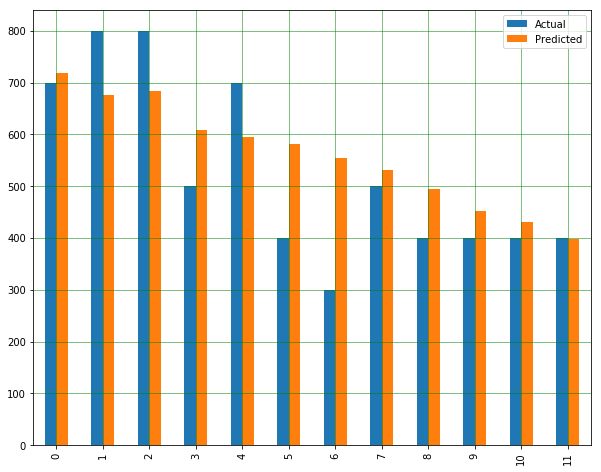

In [974]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [975]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 93.27475088733239
Mean Squared Error: 13595.285058848365
Root Mean Squared Error: 116.59882100110775


In [1010]:
#maes = []
y_preds = []
y_tests = []
kfold = KFold(5, True)
for train, test in kfold.split(X):
    print('train: %s, test: %s' % (train, test))
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    k = find_best_k(X_train, y_train, X_test, y_test)
    P, q, G, h = generate_params(X_train, y_train,k)
    gamma = cvxopt_solve_qp(P, q, G, h)
    y_pred = X_test@gammas
    y_preds.append(y_pred)
    y_tests.append(y_test)
    

train: [ 0  2  3  4  6  8  9 10 11 13 14 15 17 19 20 21 22 23 25 26 27 29 30 32
 35 36 37 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 57 58 59 60
 61 62 63], test: [ 1  5  7 12 16 18 24 28 31 33 34 38 56]
     pcost       dcost       gap    pres   dres
 0: -9.3769e+06 -9.3769e+06  5e+01  8e+00  2e-09
 1: -9.3769e+06 -9.3769e+06  2e+01  4e+00  1e-09
 2: -9.3769e+06 -9.3761e+06  2e+01  4e+00  1e-09
 3: -7.0162e+06 -9.8351e+06  5e+06  4e+00  1e-09
 4: -7.2476e+06 -9.5957e+06  5e+06  4e+00  1e-09
 5: -7.7245e+06 -9.3275e+06  5e+06  3e+00  1e-09
 6: -8.1374e+06 -8.4973e+06  3e+06  2e+00  6e-10
 7: -7.9950e+06 -8.2403e+06  2e+06  7e-01  2e-10
 8: -8.2556e+06 -8.1151e+06  8e+05  3e-01  8e-11
 9: -8.1350e+06 -8.0747e+06  5e+04  3e-02  8e-12
10: -8.0832e+06 -8.0543e+06  2e+04  9e-03  3e-12
11: -8.0648e+06 -8.0498e+06  1e+04  4e-03  1e-12
12: -8.0597e+06 -8.0280e+06  2e+04  3e-03  1e-12
13: -8.0450e+06 -8.0171e+06  1e+04  2e-03  6e-13
14: -8.0453e+06 -7.9959e+06  2e+04  2e-03  5e-13
15: -

 2: -6.6673e+06 -6.6664e+06  3e+01  4e+00  5e-09
 3: -6.4352e+06 -6.4298e+06  4e+05  4e+00  5e-09
 4: -6.4334e+06 -6.4230e+06  3e+05  2e+00  3e-09
 5: -6.3377e+06 -6.2665e+06  4e+05  2e+00  3e-09
 6: -6.0528e+06 -6.0134e+06  7e+05  1e+00  1e-09
 7: -6.0260e+06 -5.9214e+06  7e+05  7e-01  1e-09
 8: -6.0359e+06 -5.8276e+06  3e+05  3e-01  4e-10
 9: -5.8988e+06 -5.7220e+06  1e+05  1e-01  2e-10
10: -5.6072e+06 -5.4012e+06  3e+05  6e-02  8e-11
11: -5.4298e+06 -5.3732e+06  3e+04  9e-03  1e-11
12: -5.4102e+06 -5.3671e+06  2e+04  6e-03  8e-12
13: -5.3955e+06 -5.3418e+06  3e+04  5e-03  6e-12
14: -5.3895e+06 -5.3001e+06  3e+04  3e-03  5e-12
15: -5.3148e+06 -5.2097e+06  3e+04  2e-03  2e-12
16: -5.1713e+06 -5.1789e+06  8e+03  1e-18  1e-15
17: -5.1787e+06 -5.1788e+06  7e+01  4e-18  8e-16
18: -5.1788e+06 -5.1788e+06  7e-01  2e-18  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.6674e+06 -6.6673e+06  9e+01  1e+01  9e-09
 1: -6.6674e+06 -6.6673e+06  6e+01  6e+00  5e-

11: -4.9520e+06 -4.9286e+06  2e+04  8e-03  8e-12
12: -4.9378e+06 -4.9055e+06  2e+04  6e-03  6e-12
13: -4.9288e+06 -4.8777e+06  2e+04  4e-03  4e-12
14: -4.8393e+06 -4.7974e+06  4e+04  1e-03  1e-12
15: -4.7947e+06 -4.7930e+06  9e+02  4e-05  4e-14
16: -4.7930e+06 -4.7929e+06  9e+00  4e-07  2e-15
17: -4.7929e+06 -4.7929e+06  9e-02  4e-09  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.9880e+06 -5.9880e+06  5e+01  7e+00  7e-09
 1: -5.9880e+06 -5.9880e+06  2e+01  3e+00  3e-09
 2: -5.9880e+06 -5.9876e+06  2e+01  3e+00  3e-09
 3: -5.6561e+06 -5.7837e+06  7e+05  3e+00  3e-09
 4: -5.1642e+06 -5.9001e+06  2e+06  3e+00  3e-09
 5: -5.2374e+06 -5.8730e+06  2e+06  2e+00  2e-09
 6: -5.3252e+06 -5.6100e+06  2e+06  2e+00  2e-09
 7: -5.1974e+06 -5.2613e+06  2e+06  1e+00  9e-10
 8: -5.1344e+06 -5.1468e+06  4e+05  2e-01  2e-10
 9: -5.1186e+06 -5.0874e+06  3e+05  1e-01  1e-10
10: -5.0887e+06 -4.9869e+06  2e+05  6e-02  6e-11
11: -4.9902e+06 -4.9197e+06  4e+04  2e-02  2e-

23: -7.5640e+06 -7.5640e+06  6e-01  1e-08  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.9560e+06 -8.9560e+06  5e+01  7e+00  6e-09
 1: -8.9560e+06 -8.9559e+06  2e+01  3e+00  3e-09
 2: -8.9560e+06 -8.9554e+06  2e+01  3e+00  3e-09
 3: -8.9420e+06 -8.8753e+06  3e+04  3e+00  3e-09
 4: -8.6517e+06 -8.6696e+06  6e+05  3e+00  3e-09
 5: -8.5663e+06 -8.4378e+06  9e+05  3e+00  3e-09
 6: -8.4726e+06 -8.2890e+06  6e+05  2e+00  1e-09
 7: -8.2657e+06 -8.1704e+06  5e+05  9e-01  8e-10
 8: -8.2079e+06 -8.0402e+06  4e+05  5e-01  5e-10
 9: -8.1169e+06 -7.9495e+06  2e+05  2e-01  2e-10
10: -8.0046e+06 -7.8958e+06  1e+05  1e-01  9e-11
11: -7.9248e+06 -7.8235e+06  1e+05  6e-02  5e-11
12: -7.8371e+06 -7.8039e+06  2e+04  1e-02  1e-11
13: -7.8366e+06 -7.7875e+06  2e+04  1e-02  1e-11
14: -7.8294e+06 -7.7530e+06  3e+04  1e-02  9e-12
15: -7.7464e+06 -7.6296e+06  5e+04  5e-03  5e-12
16: -7.7106e+06 -7.6122e+06  5e+04  4e-03  3e-12
17: -7.7091e+06 -7.5956e+06  5e+04  4e-03  3e-

In [1005]:
y_tests = np.concatenate(y_tests)
y_preds = np.concatenate(y_preds)

In [1012]:
df = pd.DataFrame({'Actual': y_tests.flatten(), 'Predicted': y_preds.flatten()})
df.head()


Actual  \
0    [0, 2, 0, 0, 0, 0, 116, 0, 65, 0, 1144, 0, 700]   
1  [0, 0, 1, 0, 0, 1046, 1096, 1700, 700, 700, 40...   
2  [0, 0, 0, 0, 228, 833, 1569, 1641, 800, 500, 5...   
3  [0, 1, 0, 0, 0, 0, 1399, 0, 1000, 1000, 500, 0...   
4    [0, 0, 0, 11, 0, 0, 648, 600, 0, 800, 300, 500]   

                                           Predicted  
0  [0.0, 0.0018038010188065844, 0.018038012255751...  
1  [0.0, 0.1893991814223364, 0.4437352552749312, ...  
2  [0.0, 0.03246842773616533, 0.11363950470608329...  
3  [0.0, 0.003607602869605165, 1.0209518597905352...  
4  [0.0, 0.0649368564421779, 0.6421534847854843, ...

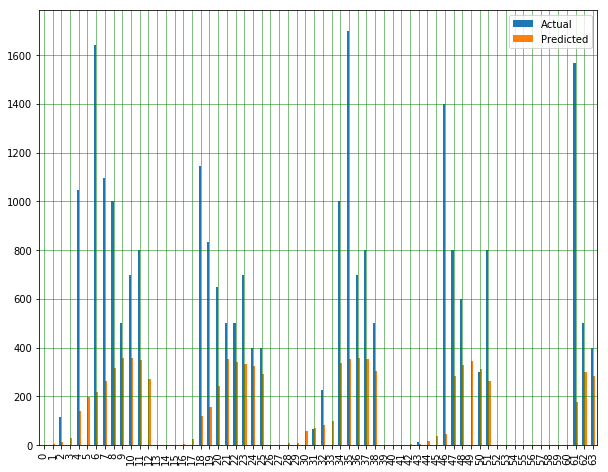

In [1007]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()